In [46]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [47]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2025-10-05 21:41:58--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 172.67.70.149, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.2’

insurance.csv.2     100%[===================>]  49.09K  --.-KB/s    in 0s      

2025-10-05 21:41:59 (162 MB/s) - ‘insurance.csv.2’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [48]:
# Convert categorical data to numbers
# Thanks https://stackoverflow.com/a/32011969 for method
# Change object data type to category
dataset['sex'] = dataset['sex'].astype('category')
dataset['smoker'] = dataset['smoker'].astype('category')
dataset['region'] = dataset['region'].astype('category')

categories = dataset.select_dtypes(['category']).columns # Select all category columns
dataset[categories] = dataset[categories].apply(lambda x: x.cat.codes) # Use cat.codes to convert to numbers

In [49]:
# Create testing and training datasets
# Dataset.sample chooses a random sample of entries from the dataset
# Thanks https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html
train_dataset = dataset.sample(frac=0.8, random_state=0)
# Dataset.drop drops the indexes that train_dataset has, leaving the remaining 20%
# Thanks https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
test_dataset = dataset.drop(train_dataset.index)

# Pop expenses column to get labels
train_labels = train_dataset.pop('expenses')
test_labels = test_dataset.pop('expenses')

In [50]:
# Thanks https://www.tensorflow.org/tutorials/keras/regression for tutorial on regression model
# Apply normalization
normalizer = layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_dataset))

# Sequential model with Dense layers
model = tf.keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(1)
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss=['mae'],
    metrics=['mae', 'mse']
)

# Fit it to the training data
model.fit(
    train_dataset,
    train_labels,
    epochs=10
)

Epoch 1/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 9895.1250 - mae: 9895.1250 - mse: 219117984.0000
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3660.4937 - mae: 3660.4937 - mse: 36035660.0000
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2734.0168 - mae: 2734.0168 - mse: 25562746.0000
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2655.1167 - mae: 2655.1167 - mse: 26822798.0000
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2456.3125 - mae: 2456.3125 - mse: 23248912.0000 
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2370.8232 - mae: 2370.8232 - mse: 22633538.0000
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2337.0706 - mae: 2337.0706 - mse: 23816686.0000
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2243.1230 - mae: 2243.1230 - mse: 25004704.0000
Epoch 9/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2387.1345 - mae: 2387.1345 - mse: 26601384.0000
Epoch 10/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 

9/9 - 0s - 46ms/step - loss: 2791.9236 - mae: 2791.9236 - mse: 33862348.0000
Testing set Mean Abs Error: 2791.92 expenses
You passed the challenge. Great job!
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


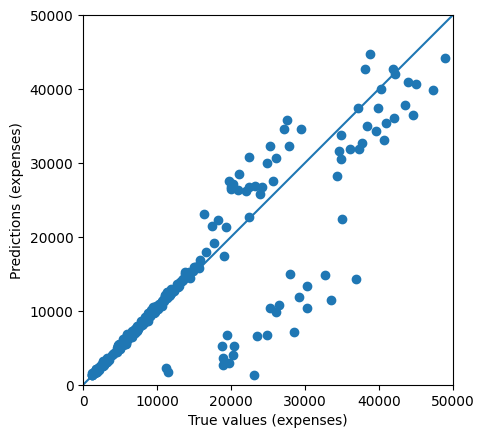

In [51]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
